# Recommendation System with Probabilistic Matrix Factorization

With the rise of streaming media and video website such as Netflix, YouTube, Spotify and many other platforms, recommendation (recommender) system is widely used to predict users' potential interests on the items which they haven't watched/listened yet. 

In this project, we specifically aim to apply probabilistic matrix factorization to solve this problem. 

## Exploratory Data Analysis

As matrix factorization could be computationally heavy, we implement our idea on a small subset of data. It is composed of 100 Users and 200 Anime. For Model training, we split our data with a train/test ratio of 9:1. 

## Box's loop 1

### Model 1: Gaussian 

The idea of matrix factorization is to decompose the rating matrix into two latent features U and V with latent factor being a desgnated constant. We experientally found out that a latent factor K between 20 and 30 is a sweet range for our purpose. K=10 will lower the model performance, and K greater than 50 will have no improvemet in terms of performance but increase computation time significantly. 

Ratings: $r_{ij} \subset [1, 10]$

$$
r_{ij} \sim \mathcal{N}(u^T_i v_j, \sigma^2)
$$


User latent feature: a matrix with dimension $100*k$, k being the latent factor

Anime latent feature: a matrix with dimension $200*k$

In our first model, we assume that the user and anime latent feature are k-dimensional latent variable vectors distributed as:: 

$$
u_i \sim \mathcal{N}_k(0, I\sigma^2_u); \\\\ v_j \sim \mathcal{N}_k(0, I\sigma^2_v) 
$$

Beside that, we also assume that $\sigma \sim \mathrm{Uniform}(0, 10)$; 

The predicted matrix is 

$$
\hat{R}_{m \times n} = U^T V
$$

The likelihood of our data is: 

$$
\ell(R|U,V,\sigma) = \prod_{i=1}^m\prod_{j=1}^n [\mathcal{N}(r_{ij}|u^T_i v_j, \sigma^2)]^{I_{ij}}
$$

where $I_{ij}=1$ if user i had rated anime j and 0 otherwise. 

### Inference on model 1

**MAP inference**

In [1]:
import torch
from utils import load_makematrix
from GaussianMF import run_GaussianMF
from PoissonMF import run_PoissonMF
from visualization import *

k = 30

anime_data, anime_matrix_train, anime_data_test = load_makematrix("data/ratings_100_200_real.csv", split=True)
loss_list, mae_list = run_GaussianMF(anime_matrix_train, anime_data_test, k = k, method="map", mae_tol = 0.05)

[iter 0]  loss: 88107957.1728 Test MAE: 7.6335
[iter 250]  loss: 9710353.9180 Test MAE: 7.6335
[iter 500]  loss: 9703657.6773 Test MAE: 7.6335
[iter 750]  loss: 9703656.7566 Test MAE: 7.6335


**Criticism**

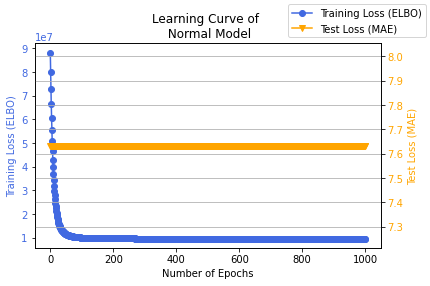

In [2]:
learning_curve_plot(loss_list, mae_list)

**SVI inference**

In [3]:
loss_list, mae_list = run_GaussianMF(anime_matrix_train, anime_data_test, k = k, method = "svi", mae_tol = 0.02)

[iter 0]  loss: 168894882.5039 Test MAE: 7.6332
[iter 250]  loss: 5996485.3684 Test MAE: 0.9696
[iter 500]  loss: 4873891.0625 Test MAE: 0.9023
[stop at iter 504]  loss: 4825559.0039 Test MAE: 0.9287


**SVI criticism**

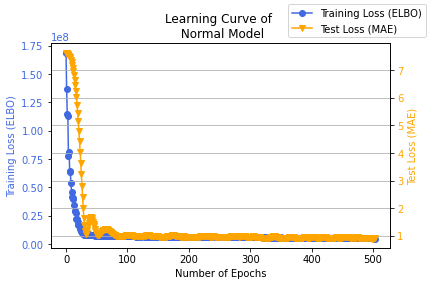

In [4]:
learning_curve_plot(loss_list, mae_list)

In [6]:
import pyro
R = torch.mm(pyro.param("u_mean"), pyro.param("v_mean").t())
print(f'SVI estimate of R: {torch.mm(pyro.param("u_mean"), pyro.param("v_mean").t())}')

SVI estimate of R: tensor([[ 7.5021,  5.8325,  5.6572,  ...,  6.8153,  7.8675,  8.5787],
        [ 9.1793,  9.2292,  9.3649,  ...,  8.8388, 10.1325, 10.9313],
        [ 7.5158,  7.6007,  7.8465,  ...,  6.3319,  7.0913,  7.9486],
        ...,
        [ 8.1259,  7.6331,  7.5488,  ...,  7.1623,  7.8088,  8.6252],
        [ 8.3122,  7.8839,  7.7903,  ...,  7.7570,  8.2684,  9.1614],
        [ 8.2058,  7.2644,  7.0296,  ...,  7.8542,  8.6324,  9.4381]],
       grad_fn=<MmBackward>)


In [7]:
print('The MAE is', mae_list[-1])

The MAE is 0.9193001553320116


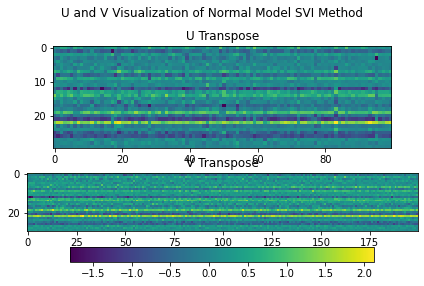

In [10]:
import importlib
import visualization
importlib.reload(visualization)
from visualization import U_V_visualization
U_V_visualization()

In [ ]:
import GaussianMF
import importlib
importlib.reload(GaussianMF)
from GaussianMF import run_GaussianMF

hmc_samples = run_GaussianMF(anime_matrix_train, anime_data_test, k = k, mae_tol = 0.02, method = "hmc")

Warmup:   3%|▎         | 33/1200 [11:49, 64.42s/it, step size=4.30e-05, acc. prob=0.762]

## Box's loop 2
### Model 2: Poisson

With other thins similar to model 1, we assume a difference distribution for ratings. Specifically, we assume that 

$$r_{ij} \sim \mathcal{Pois} (u^T_i v_j)$$

then the likelihood is: 

$$
\ell(R|U,V,\sigma) = \prod_{i=1}^m\prod_{j=1}^n [\mathcal{Pois}(r_{ij}|u^T_i v_j)]^{I_{ij}}
$$

### Inference on model 2

In [ ]:
loss_list, mae_list = run_PoissonMF(anime_matrix_train, anime_data_test, k = k, mae_tol = 0.02)

In [ ]:
import PoissonMF
import importlib
importlib.reload(PoissonMF)
from PoissonMF import run_PoissonMF

hmc_samples = run_PoissonMF(anime_matrix_train, anime_data_test, k = k, mae_tol = 0.02, method = "hmc")

In [ ]:
for site, values in hmc_samples.items():
    print("Site: {}".format(site))
    print(values, "\n")

**SVI criticism**

In [ ]:
R = torch.mm(pyro.param("u_mean"), pyro.param("v_mean").t())
print(f'SVI estimate of R: {R}')